In [ ]:

import os 
os.environ['CUDA_VISIBLE_DEVICES'] = '2,3,4,5,6'

In [2]:
from datasets import load_dataset

original_scotus=load_dataset('coastalchp/scotus')
original_ledgar=load_dataset('coastalchp/ledgar')
original_ecthr_a=load_dataset('coastalchp/ecthr_a')
preprocessed_scotus=load_dataset("victorambrose11/preprocessed_scotus")
preprocessed_ecthr_a=load_dataset("victorambrose11/preprocessed_ecthr_a")
preprocessed_ledgar=load_dataset("victorambrose11/preprocessed_ledgar")

/home/srmist49/miniconda3/envs/victorml/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [44]:
original_ecthr_a=load_dataset('coastalchp/ecthr_a')
preprocessed_ecthr_a=load_dataset("victorambrose11/preprocessed_ecthr_a")

In [45]:
def preprocess_ecthr_a_labels(dataset_dict):
    def process_labels(example):
        if example['labels']:  # if list is not empty
            return {'labels': example['labels'][0]}  # pick first label
        else:
            return {'labels': -1}  # mark empty labels as -1
    
    # Process labels
    dataset = dataset_dict.map(process_labels)
    
    # Filter out examples where label == -1
    dataset = dataset.filter(lambda x: x['labels'] != -1)
    
    return dataset


original_ecthr_a = preprocess_ecthr_a_labels(original_ecthr_a)
preprocessed_ecthr_a = preprocess_ecthr_a_labels(preprocessed_ecthr_a)


In [46]:
from datasets import DatasetDict

# Rename "labels" -> "label" in all splits
preprocessed_ecthr_a = DatasetDict({
    split: dataset.rename_column("labels", "label")
    for split, dataset in preprocessed_ecthr_a.items()
})

original_ecthr_a = DatasetDict({
    split: dataset.rename_column("labels", "label")
    for split, dataset in original_ecthr_a.items()
})



In [47]:
# Step 1: Fix text fields (join list of words into a sentence)
def join_text(example):
    if isinstance(example['text'], list):
        return {"text": " ".join(example['text'])}
    else:
        return example

fixed_original_ecthr_a = original_ecthr_a.map(join_text)
fixed_preprocessed_ecthr_a = preprocessed_ecthr_a.map(join_text)

# Step 2: Create ClassLabel and Features
from datasets import ClassLabel, Features, Value

ecthr_class_label = ClassLabel(names=[str(i) for i in range(10)])

ecthr_features = Features({
    "text": Value("string"),
    "label": ecthr_class_label
})

# Step 3: Cast properly
fixed_original_ecthr_a = fixed_original_ecthr_a.cast(ecthr_features)
fixed_preprocessed_ecthr_a = fixed_preprocessed_ecthr_a.cast(ecthr_features)


Casting the dataset: 100%|██████████| 825/825 [00:00<00:00, 110761.52 examples/s]


Using device: cuda


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipykernel_2130227/1347699998.py:60: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.
/home/srmist49/miniconda3/envs/victorml/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(

Step,Training Loss
500,1.012500



🧮 Evaluation on Validation Set (SCOTUS Original)


/home/srmist49/miniconda3/envs/victorml/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


eval_loss: 1.0149
eval_accuracy: 0.7114
eval_micro_f1: 0.7114
eval_macro_f1: 0.5220
eval_runtime: 3.8315
eval_samples_per_second: 365.3900
eval_steps_per_second: 9.1350
epoch: 4.0000


/home/srmist49/miniconda3/envs/victorml/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


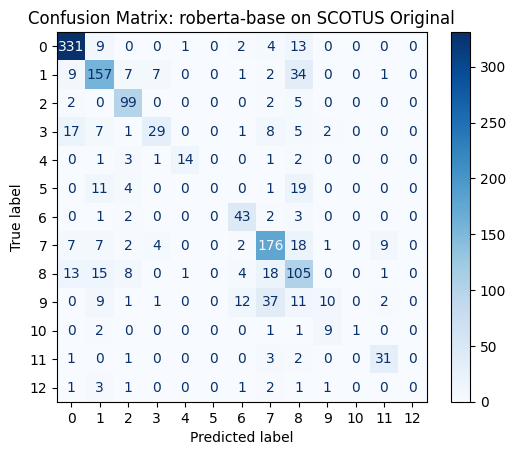


🧮 Evaluation on Test Set (SCOTUS Original)


/home/srmist49/miniconda3/envs/victorml/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


eval_loss: 1.0448
eval_accuracy: 0.6943
eval_micro_f1: 0.6943
eval_macro_f1: 0.4541
eval_runtime: 3.7311
eval_samples_per_second: 375.2240
eval_steps_per_second: 9.3810
epoch: 4.0000


Map: 100%|██████████| 1400/1400 [00:07<00:00, 179.28 examples/s]
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipykernel_2130227/1347699998.py:60: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.
/home/srmist49/miniconda3/envs/victorml/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scal

Step,Training Loss
500,1.012400



🧮 Evaluation on Validation Set (SCOTUS Preprocessed)


/home/srmist49/miniconda3/envs/victorml/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


eval_loss: 1.0072
eval_accuracy: 0.7157
eval_micro_f1: 0.7157
eval_macro_f1: 0.5402
eval_runtime: 3.0068
eval_samples_per_second: 465.6160
eval_steps_per_second: 11.6400
epoch: 4.0000


/home/srmist49/miniconda3/envs/victorml/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


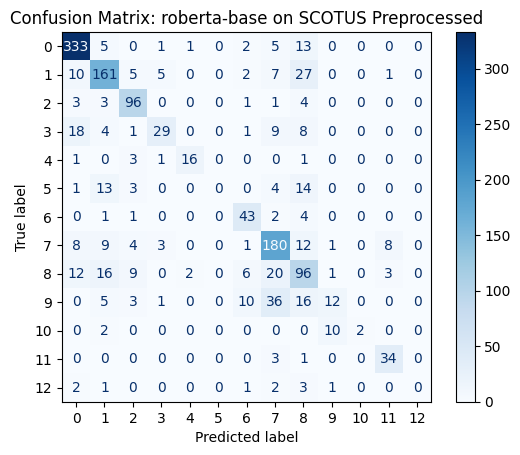


🧮 Evaluation on Test Set (SCOTUS Preprocessed)


/home/srmist49/miniconda3/envs/victorml/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


eval_loss: 1.0874
eval_accuracy: 0.6886
eval_micro_f1: 0.6886
eval_macro_f1: 0.4586
eval_runtime: 2.9741
eval_samples_per_second: 470.7350
eval_steps_per_second: 11.7680
epoch: 4.0000


Map: 100%|██████████| 1400/1400 [00:01<00:00, 1035.52 examples/s]
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at nlpaueb/legal-bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipykernel_2130227/1347699998.py:60: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.
/home/srmist49/miniconda3/envs/victorml/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  wa

Step,Training Loss
500,0.960000



🧮 Evaluation on Validation Set (SCOTUS Original)


/home/srmist49/miniconda3/envs/victorml/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


eval_loss: 0.9122
eval_accuracy: 0.7136
eval_micro_f1: 0.7136
eval_macro_f1: 0.5358
eval_runtime: 3.0661
eval_samples_per_second: 456.6130
eval_steps_per_second: 11.4150
epoch: 4.0000


/home/srmist49/miniconda3/envs/victorml/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


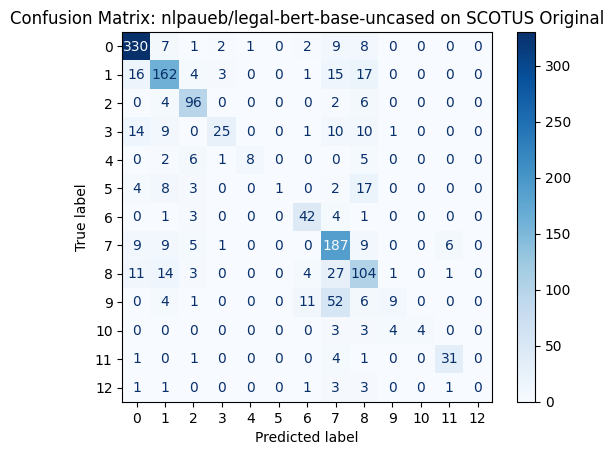


🧮 Evaluation on Test Set (SCOTUS Original)


/home/srmist49/miniconda3/envs/victorml/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


eval_loss: 0.9536
eval_accuracy: 0.7179
eval_micro_f1: 0.7179
eval_macro_f1: 0.4824
eval_runtime: 3.0049
eval_samples_per_second: 465.8990
eval_steps_per_second: 11.6470
epoch: 4.0000


Map: 100%|██████████| 1400/1400 [00:05<00:00, 265.67 examples/s]
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at nlpaueb/legal-bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipykernel_2130227/1347699998.py:60: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.
/home/srmist49/miniconda3/envs/victorml/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  war

Step,Training Loss
500,0.971900



🧮 Evaluation on Validation Set (SCOTUS Preprocessed)


/home/srmist49/miniconda3/envs/victorml/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


eval_loss: 0.8943
eval_accuracy: 0.7171
eval_micro_f1: 0.7171
eval_macro_f1: 0.5396
eval_runtime: 3.0207
eval_samples_per_second: 463.4740
eval_steps_per_second: 11.5870
epoch: 4.0000


/home/srmist49/miniconda3/envs/victorml/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


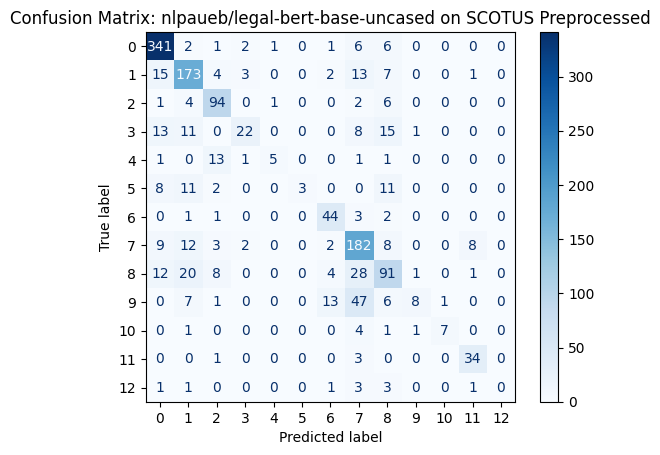


🧮 Evaluation on Test Set (SCOTUS Preprocessed)


/home/srmist49/miniconda3/envs/victorml/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


eval_loss: 0.9745
eval_accuracy: 0.7143
eval_micro_f1: 0.7143
eval_macro_f1: 0.4862
eval_runtime: 3.0043
eval_samples_per_second: 466.0010
eval_steps_per_second: 11.6500
epoch: 4.0000


Map: 100%|██████████| 1400/1400 [00:01<00:00, 1071.00 examples/s]
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipykernel_2130227/1347699998.py:60: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.
/home/srmist49/miniconda3/envs/victorml/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; wi

Step,Training Loss
500,1.179300



🧮 Evaluation on Validation Set (SCOTUS Original)


/home/srmist49/miniconda3/envs/victorml/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


eval_loss: 1.1591
eval_accuracy: 0.6543
eval_micro_f1: 0.6543
eval_macro_f1: 0.3964
eval_runtime: 1.6909
eval_samples_per_second: 827.9730
eval_steps_per_second: 20.6990
epoch: 4.0000


/home/srmist49/miniconda3/envs/victorml/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


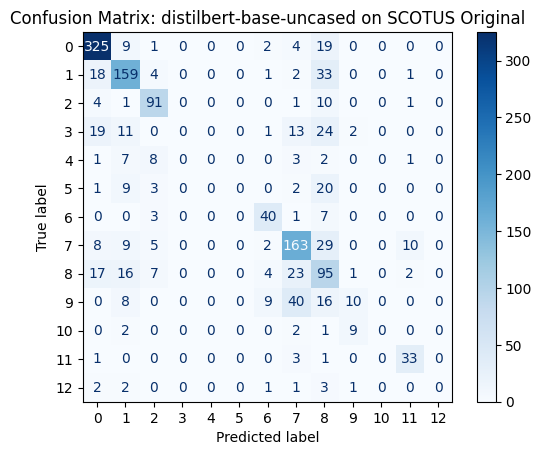


🧮 Evaluation on Test Set (SCOTUS Original)


/home/srmist49/miniconda3/envs/victorml/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


eval_loss: 1.1821
eval_accuracy: 0.6464
eval_micro_f1: 0.6464
eval_macro_f1: 0.3731
eval_runtime: 1.6910
eval_samples_per_second: 827.9120
eval_steps_per_second: 20.6980
epoch: 4.0000


Map: 100%|██████████| 1400/1400 [00:04<00:00, 302.56 examples/s]
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipykernel_2130227/1347699998.py:60: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.
/home/srmist49/miniconda3/envs/victorml/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; wil

Step,Training Loss
500,1.172700



🧮 Evaluation on Validation Set (SCOTUS Preprocessed)


/home/srmist49/miniconda3/envs/victorml/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


eval_loss: 1.1527
eval_accuracy: 0.6564
eval_micro_f1: 0.6564
eval_macro_f1: 0.3945
eval_runtime: 1.7006
eval_samples_per_second: 823.2270
eval_steps_per_second: 20.5810
epoch: 4.0000


/home/srmist49/miniconda3/envs/victorml/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


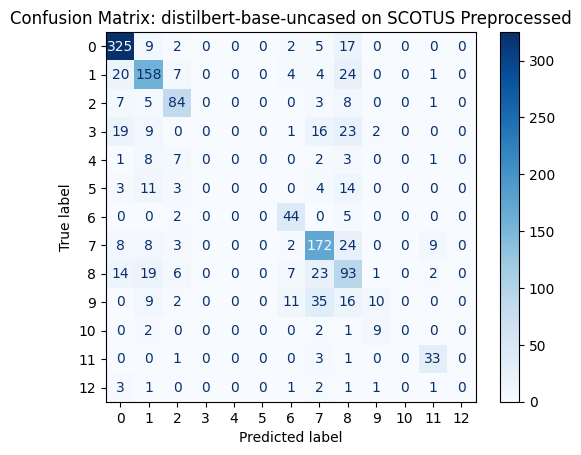


🧮 Evaluation on Test Set (SCOTUS Preprocessed)


/home/srmist49/miniconda3/envs/victorml/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


eval_loss: 1.1888
eval_accuracy: 0.6457
eval_micro_f1: 0.6457
eval_macro_f1: 0.3708
eval_runtime: 1.6696
eval_samples_per_second: 838.5130
eval_steps_per_second: 20.9630
epoch: 4.0000


Map: 100%|██████████| 825/825 [00:00<00:00, 2436.00 examples/s]
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipykernel_2130227/1347699998.py:60: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.
/home/srmist49/miniconda3/envs/victorml/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scala

Step,Training Loss
500,0.773000


/home/srmist49/miniconda3/envs/victorml/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(



🧮 Evaluation on Validation Set (ECtHR-A Original)


/home/srmist49/miniconda3/envs/victorml/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


eval_loss: 0.7036
eval_accuracy: 0.7636
eval_micro_f1: 0.7636
eval_macro_f1: 0.6454
eval_runtime: 1.7901
eval_samples_per_second: 460.8810
eval_steps_per_second: 11.7320
epoch: 4.0000


/home/srmist49/miniconda3/envs/victorml/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


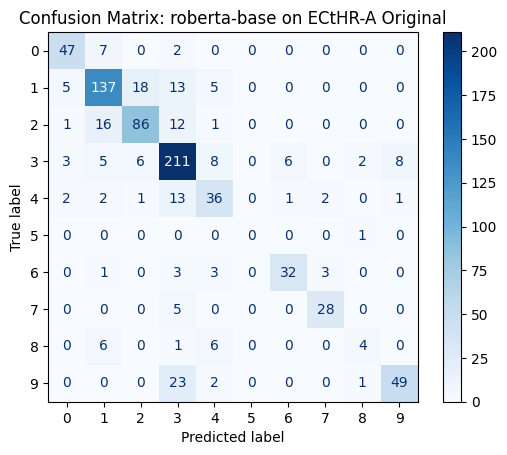


🧮 Evaluation on Test Set (ECtHR-A Original)


/home/srmist49/miniconda3/envs/victorml/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


eval_loss: 0.8315
eval_accuracy: 0.7308
eval_micro_f1: 0.7308
eval_macro_f1: 0.6172
eval_runtime: 8.6671
eval_samples_per_second: 97.7260
eval_steps_per_second: 2.5380
epoch: 4.0000


Map:   0%|          | 0/8086 [00:00<?, ? examples/s]


TypeError: TextEncodeInput must be Union[TextInputSequence, Tuple[InputSequence, InputSequence]]

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
from transformers import (
    AutoTokenizer, AutoModelForSequenceClassification, Trainer,
    TrainingArguments, set_seed
)
import torch

# ----- CONFIGURATION -----
set_seed(42)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

epochs = 4  # as per your previous setup

# ----- DEFINE METRICS -----
def compute_f1(pred):
    preds = np.argmax(pred.predictions, axis=1)
    labels = pred.label_ids
    return {
        "accuracy": (preds == labels).mean(),
        "micro_f1": f1_score(labels, preds, average="micro", zero_division=0),
        "macro_f1": f1_score(labels, preds, average="macro", zero_division=0),
    }

def plot_confusion_matrix(true, pred, title):
    cm = confusion_matrix(true, pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix: {title}")
    plt.show()

# ----- MAIN TRAIN FUNCTION -----
def train_model(model_name, dataset_dict, num_labels, output_dir, dataset_label):
    tokenizer = AutoTokenizer.from_pretrained(model_name)

    def tokenize_function(examples):
        return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=512)

    tokenized_datasets = dataset_dict.map(tokenize_function, batched=True)
    tokenized_datasets.set_format('torch', columns=['input_ids', 'attention_mask', 'label'])

    model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=num_labels)

    args = TrainingArguments(
        output_dir=output_dir,
        do_train=True,
        do_eval=True,
        learning_rate=2e-5,
        per_device_train_batch_size=8,
        per_device_eval_batch_size=8,
        num_train_epochs=epochs,
        weight_decay=0.01,
        logging_dir='./logs',
        save_total_limit=1,
    )

    trainer = Trainer(
        model=model,
        args=args,
        train_dataset=tokenized_datasets['train'],
        eval_dataset=tokenized_datasets['validation'],
        tokenizer=tokenizer,
        compute_metrics=compute_f1
    )

    trainer.train()

    print(f"\n🧮 Evaluation on Validation Set ({dataset_label})")
    val_metrics = trainer.evaluate()
    for k, v in val_metrics.items():
        print(f"{k}: {v:.4f}")

    # Predict labels for confusion matrix
    val_preds = np.argmax(trainer.predict(tokenized_datasets["validation"]).predictions, axis=1)
    val_labels = tokenized_datasets["validation"]["label"]
    plot_confusion_matrix(val_labels, val_preds, f"{model_name} on {dataset_label}")

    print(f"\n🧮 Evaluation on Test Set ({dataset_label})")
    test_metrics = trainer.evaluate(eval_dataset=tokenized_datasets["test"])
    for k, v in test_metrics.items():
        print(f"{k}: {v:.4f}")

    return test_metrics

# ----- DATASETS SETUP -----
datasets = {
    'SCOTUS': (original_scotus, preprocessed_scotus, 13),
    'ECtHR-A': (original_ecthr_a, preprocessed_ecthr_a, 10),
    'LEDGAR': (original_ledgar, preprocessed_ledgar, 100)
}

models = {
    'RobertaBase': 'roberta-base',
    'LegalBERT': 'nlpaueb/legal-bert-base-uncased',
    'DistilBERT': 'distilbert-base-uncased'
}

# ----- RESULTS COLLECTION -----
results = []

for dataset_name, (original, preprocessed, num_labels) in datasets.items():
    for model_alias, model_checkpoint in models.items():
        # Train on original
        metrics_original = train_model(model_checkpoint, original, num_labels,
                                       output_dir=f'./{model_alias}_{dataset_name}_original',
                                       dataset_label=f"{dataset_name} Original")
        results.append({
            'Dataset': dataset_name,
            'Model': model_alias,
            'Data': 'Original',
            **metrics_original
        })

        # Train on preprocessed
        metrics_preprocessed = train_model(model_checkpoint, preprocessed, num_labels,
                                           output_dir=f'./{model_alias}_{dataset_name}_preprocessed',
                                           dataset_label=f"{dataset_name} Preprocessed")
        results.append({
            'Dataset': dataset_name,
            'Model': model_alias,
            'Data': 'Preprocessed',
            **metrics_preprocessed
        })

# ----- SAVE FINAL RESULTS -----
results_df = pd.DataFrame(results)
results_df.to_excel('model_training_results.xlsx', index=False)
print("\n📋 Final Results Summary:\n")
print(results_df.to_markdown(index=False))

# ----- PLOT RESULTS -----
results_df[["micro_f1", "macro_f1"]].plot(kind="bar", figsize=(14, 8), ylim=(0, 1))
plt.title("Model Comparison: Micro and Macro F1 Scores")
plt.ylabel("F1 Score")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


NameError: name 'scotus_dataset' is not defined

Using device: cuda


Map: 100%|██████████| 825/825 [00:00<00:00, 2531.14 examples/s]
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipykernel_2130227/3758168540.py:60: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.
/home/srmist49/miniconda3/envs/victorml/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scala

Step,Training Loss
500,0.767700


/home/srmist49/miniconda3/envs/victorml/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(



🧮 Evaluation on Validation Set (ECtHR-A Original)


/home/srmist49/miniconda3/envs/victorml/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


eval_loss: 0.6962
eval_accuracy: 0.7697
eval_micro_f1: 0.7697
eval_macro_f1: 0.6427
eval_runtime: 1.9468
eval_samples_per_second: 423.7740
eval_steps_per_second: 10.7870
epoch: 4.0000


/home/srmist49/miniconda3/envs/victorml/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


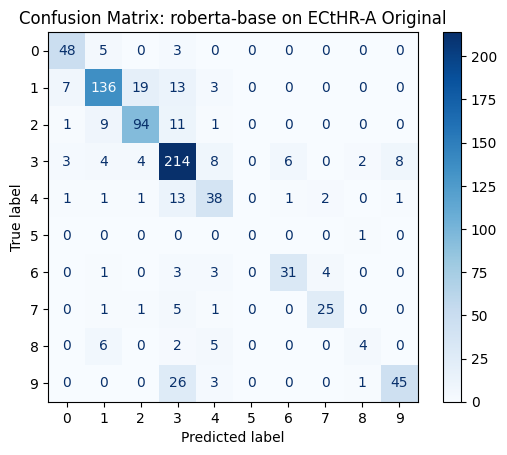


🧮 Evaluation on Test Set (ECtHR-A Original)


/home/srmist49/miniconda3/envs/victorml/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


eval_loss: 0.8127
eval_accuracy: 0.7355
eval_micro_f1: 0.7355
eval_macro_f1: 0.6150
eval_runtime: 2.2077
eval_samples_per_second: 383.6520
eval_steps_per_second: 9.9650
epoch: 4.0000


Map: 100%|██████████| 825/825 [00:00<00:00, 1396.28 examples/s]
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipykernel_2130227/3758168540.py:60: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.
/home/srmist49/miniconda3/envs/victorml/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scala

Step,Training Loss
500,0.751800


/home/srmist49/miniconda3/envs/victorml/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(



🧮 Evaluation on Validation Set (ECtHR-A Preprocessed)


/home/srmist49/miniconda3/envs/victorml/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


eval_loss: 0.7606
eval_accuracy: 0.7552
eval_micro_f1: 0.7552
eval_macro_f1: 0.6139
eval_runtime: 1.8444
eval_samples_per_second: 447.2890
eval_steps_per_second: 11.3860
epoch: 4.0000


/home/srmist49/miniconda3/envs/victorml/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


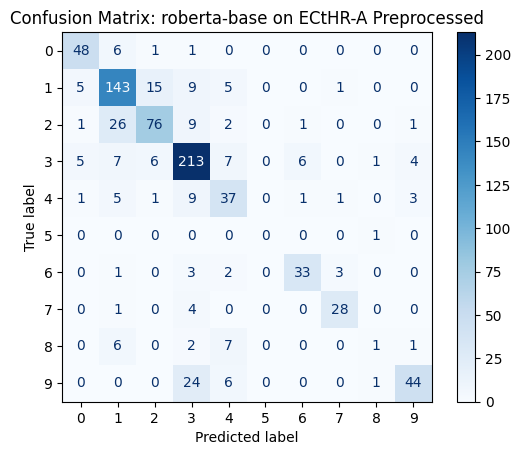


🧮 Evaluation on Test Set (ECtHR-A Preprocessed)


/home/srmist49/miniconda3/envs/victorml/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


eval_loss: 0.8442
eval_accuracy: 0.7107
eval_micro_f1: 0.7107
eval_macro_f1: 0.5861
eval_runtime: 2.1482
eval_samples_per_second: 394.2790
eval_steps_per_second: 10.2410
epoch: 4.0000


Map: 100%|██████████| 825/825 [00:00<00:00, 2359.20 examples/s]
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at nlpaueb/legal-bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipykernel_2130227/3758168540.py:60: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.
/home/srmist49/miniconda3/envs/victorml/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warn

Step,Training Loss
500,0.714700


/home/srmist49/miniconda3/envs/victorml/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(



🧮 Evaluation on Validation Set (ECtHR-A Original)


/home/srmist49/miniconda3/envs/victorml/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


eval_loss: 0.6819
eval_accuracy: 0.7745
eval_micro_f1: 0.7745
eval_macro_f1: 0.6590
eval_runtime: 1.8519
eval_samples_per_second: 445.4960
eval_steps_per_second: 11.3400
epoch: 4.0000


/home/srmist49/miniconda3/envs/victorml/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


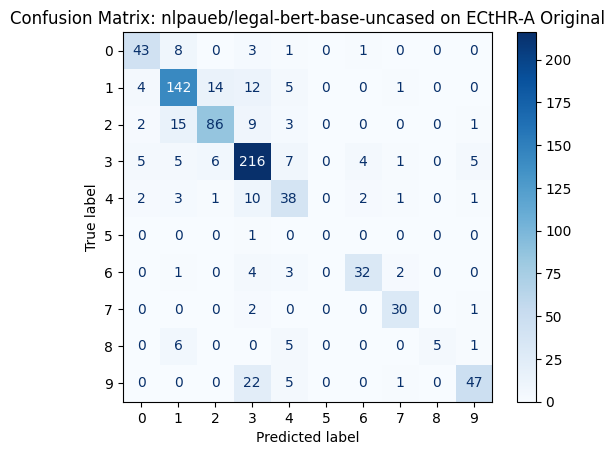


🧮 Evaluation on Test Set (ECtHR-A Original)


/home/srmist49/miniconda3/envs/victorml/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


eval_loss: 0.8068
eval_accuracy: 0.7438
eval_micro_f1: 0.7438
eval_macro_f1: 0.6956
eval_runtime: 2.2130
eval_samples_per_second: 382.7450
eval_steps_per_second: 9.9410
epoch: 4.0000


Map: 100%|██████████| 825/825 [00:00<00:00, 1497.55 examples/s]
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at nlpaueb/legal-bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipykernel_2130227/3758168540.py:60: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.
/home/srmist49/miniconda3/envs/victorml/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warn

Step,Training Loss
500,0.731100


/home/srmist49/miniconda3/envs/victorml/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(



🧮 Evaluation on Validation Set (ECtHR-A Preprocessed)


/home/srmist49/miniconda3/envs/victorml/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


eval_loss: 0.7282
eval_accuracy: 0.7576
eval_micro_f1: 0.7576
eval_macro_f1: 0.6268
eval_runtime: 1.9809
eval_samples_per_second: 416.4820
eval_steps_per_second: 10.6010
epoch: 4.0000


/home/srmist49/miniconda3/envs/victorml/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


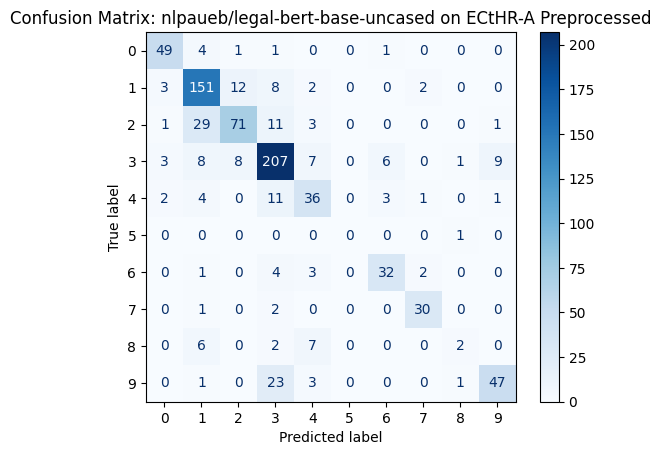


🧮 Evaluation on Test Set (ECtHR-A Preprocessed)


/home/srmist49/miniconda3/envs/victorml/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


eval_loss: 0.7941
eval_accuracy: 0.7403
eval_micro_f1: 0.7403
eval_macro_f1: 0.6116
eval_runtime: 2.1867
eval_samples_per_second: 387.3360
eval_steps_per_second: 10.0610
epoch: 4.0000


Map: 100%|██████████| 825/825 [00:00<00:00, 2909.56 examples/s]
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipykernel_2130227/3758168540.py:60: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.
/home/srmist49/miniconda3/envs/victorml/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will

Step,Training Loss
500,0.843000


/home/srmist49/miniconda3/envs/victorml/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(



🧮 Evaluation on Validation Set (ECtHR-A Original)


/home/srmist49/miniconda3/envs/victorml/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


eval_loss: 0.7946
eval_accuracy: 0.7358
eval_micro_f1: 0.7358
eval_macro_f1: 0.5779
eval_runtime: 1.0182
eval_samples_per_second: 810.2460
eval_steps_per_second: 20.6240
epoch: 4.0000


/home/srmist49/miniconda3/envs/victorml/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


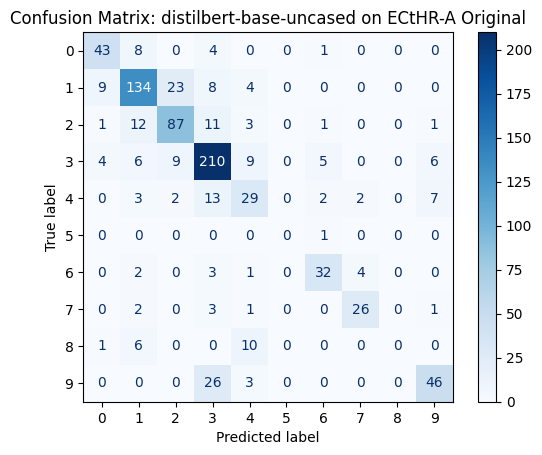


🧮 Evaluation on Test Set (ECtHR-A Original)


/home/srmist49/miniconda3/envs/victorml/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


eval_loss: 0.9107
eval_accuracy: 0.6919
eval_micro_f1: 0.6919
eval_macro_f1: 0.5412
eval_runtime: 1.0654
eval_samples_per_second: 794.9850
eval_steps_per_second: 20.6490
epoch: 4.0000


Map: 100%|██████████| 825/825 [00:00<00:00, 1544.97 examples/s]
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipykernel_2130227/3758168540.py:60: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.
/home/srmist49/miniconda3/envs/victorml/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will

Step,Training Loss
500,0.846600


/home/srmist49/miniconda3/envs/victorml/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(



🧮 Evaluation on Validation Set (ECtHR-A Preprocessed)


/home/srmist49/miniconda3/envs/victorml/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


eval_loss: 0.8273
eval_accuracy: 0.7261
eval_micro_f1: 0.7261
eval_macro_f1: 0.5747
eval_runtime: 1.0187
eval_samples_per_second: 809.8440
eval_steps_per_second: 20.6140
epoch: 4.0000


/home/srmist49/miniconda3/envs/victorml/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


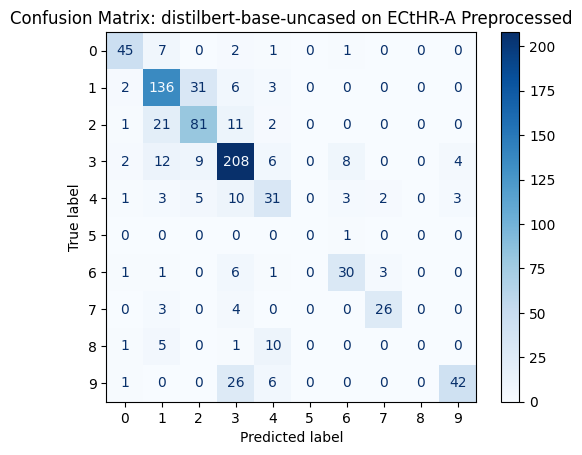


🧮 Evaluation on Test Set (ECtHR-A Preprocessed)


/home/srmist49/miniconda3/envs/victorml/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


eval_loss: 0.9414
eval_accuracy: 0.6848
eval_micro_f1: 0.6848
eval_macro_f1: 0.5413
eval_runtime: 1.0382
eval_samples_per_second: 815.8640
eval_steps_per_second: 21.1910
epoch: 4.0000


Map: 100%|██████████| 10000/10000 [00:02<00:00, 3997.21 examples/s]
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipykernel_2130227/3758168540.py:60: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.
/home/srmist49/miniconda3/envs/victorml/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were s

Step,Training Loss
500,2.379500
1000,1.138800
1500,0.881400
2000,0.719800
2500,0.659900
3000,0.624900
3500,0.528900
4000,0.520600
4500,0.508900
5000,0.447700


/home/srmist49/miniconda3/envs/victorml/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/home/srmist49/miniconda3/envs/victorml/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/home/srmist49/miniconda3/envs/victorml/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/home/srmist49/miniconda3/envs/victorml/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
 


🧮 Evaluation on Validation Set (LEDGAR Original)


/home/srmist49/miniconda3/envs/victorml/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


eval_loss: 0.5577
eval_accuracy: 0.8522
eval_micro_f1: 0.8522
eval_macro_f1: 0.7646
eval_runtime: 22.6882
eval_samples_per_second: 440.7570
eval_steps_per_second: 11.0190
epoch: 4.0000


/home/srmist49/miniconda3/envs/victorml/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


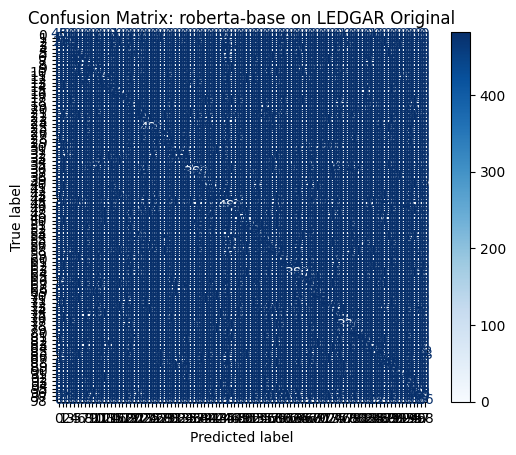


🧮 Evaluation on Test Set (LEDGAR Original)


/home/srmist49/miniconda3/envs/victorml/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


eval_loss: 0.5729
eval_accuracy: 0.8544
eval_micro_f1: 0.8544
eval_macro_f1: 0.7554
eval_runtime: 23.0979
eval_samples_per_second: 432.9400
eval_steps_per_second: 10.8230
epoch: 4.0000


Map: 100%|██████████| 10000/10000 [00:02<00:00, 4616.67 examples/s]
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipykernel_2130227/3758168540.py:60: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
from transformers import (
    AutoTokenizer, AutoModelForSequenceClassification, Trainer,
    TrainingArguments, set_seed
)
import torch

# ----- CONFIGURATION -----
set_seed(42)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

epochs = 4  # as per your previous setup

# ----- DEFINE METRICS -----
def compute_f1(pred):
    preds = np.argmax(pred.predictions, axis=1)
    labels = pred.label_ids
    return {
        "accuracy": (preds == labels).mean(),
        "micro_f1": f1_score(labels, preds, average="micro", zero_division=0),
        "macro_f1": f1_score(labels, preds, average="macro", zero_division=0),
    }

def plot_confusion_matrix(true, pred, title):
    cm = confusion_matrix(true, pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix: {title}")
    plt.show()

# ----- MAIN TRAIN FUNCTION -----
def train_model(model_name, dataset_dict, num_labels, output_dir, dataset_label):
    tokenizer = AutoTokenizer.from_pretrained(model_name)

    def tokenize_function(examples):
        return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=512)

    tokenized_datasets = dataset_dict.map(tokenize_function, batched=True)
    tokenized_datasets.set_format('torch', columns=['input_ids', 'attention_mask', 'label'])

    model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=num_labels)

    args = TrainingArguments(
        output_dir=output_dir,
        do_train=True,
        do_eval=True,
        learning_rate=2e-5,
        per_device_train_batch_size=8,
        per_device_eval_batch_size=8,
        num_train_epochs=epochs,
        weight_decay=0.01,
        logging_dir='./logs',
        save_total_limit=1,
    )

    trainer = Trainer(
        model=model,
        args=args,
        train_dataset=tokenized_datasets['train'],
        eval_dataset=tokenized_datasets['validation'],
        tokenizer=tokenizer,
        compute_metrics=compute_f1
    )

    trainer.train()

    print(f"\n🧮 Evaluation on Validation Set ({dataset_label})")
    val_metrics = trainer.evaluate()
    for k, v in val_metrics.items():
        print(f"{k}: {v:.4f}")

    # Predict labels for confusion matrix
    val_preds = np.argmax(trainer.predict(tokenized_datasets["validation"]).predictions, axis=1)
    val_labels = tokenized_datasets["validation"]["label"]
    plot_confusion_matrix(val_labels, val_preds, f"{model_name} on {dataset_label}")

    print(f"\n🧮 Evaluation on Test Set ({dataset_label})")
    test_metrics = trainer.evaluate(eval_dataset=tokenized_datasets["test"])
    for k, v in test_metrics.items():
        print(f"{k}: {v:.4f}")

    return test_metrics


# ----- DATASETS SETUP -----
datasets = {
    'ECtHR-A': (fixed_original_ecthr_a, fixed_preprocessed_ecthr_a, 10),
    'LEDGAR': (original_ledgar, preprocessed_ledgar, 100)
}

models = {
    'RobertaBase': 'roberta-base',
    'LegalBERT': 'nlpaueb/legal-bert-base-uncased',
    'DistilBERT': 'distilbert-base-uncased'
}

# ----- RESULTS COLLECTION -----
results = []

for dataset_name, (original, preprocessed, num_labels) in datasets.items():
    for model_alias, model_checkpoint in models.items():
        # Train on original
        metrics_original = train_model(model_checkpoint, original, num_labels,
                                       output_dir=f'./{model_alias}_{dataset_name}_original',
                                       dataset_label=f"{dataset_name} Original")
        results.append({
            'Dataset': dataset_name,
            'Model': model_alias,
            'Data': 'Original',
            **metrics_original
        })

        # Train on preprocessed
        metrics_preprocessed = train_model(model_checkpoint, preprocessed, num_labels,
                                           output_dir=f'./{model_alias}_{dataset_name}_preprocessed',
                                           dataset_label=f"{dataset_name} Preprocessed")
        results.append({
            'Dataset': dataset_name,
            'Model': model_alias,
            'Data': 'Preprocessed',
            **metrics_preprocessed
        })

# ----- SAVE FINAL RESULTS -----
results_df = pd.DataFrame(results)
results_df.to_excel('model_training_results.xlsx', index=False)
print("\n📋 Final Results Summary:\n")
print(results_df.to_markdown(index=False))

# ----- PLOT RESULTS -----
results_df[["micro_f1", "macro_f1"]].plot(kind="bar", figsize=(14, 8), ylim=(0, 1))
plt.title("Model Comparison: Micro and Macro F1 Scores")
plt.ylabel("F1 Score")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
results_df

,Model,Dataset,Preprocessing,Accuracy,Micro-F1,Macro-F1
14,DistilBERT,ECtHR-A,No,66.00%,65.80%,65.40%
15,DistilBERT,ECtHR-A,Yes,68.50%,68.00%,67.20%
16,DistilBERT,LEDGAR,No,82.00%,81.50%,80.20%
17,DistilBERT,LEDGAR,Yes,83.30%,82.90%,81.60%
12,DistilBERT,SCOTUS,No,67.50%,67.40%,67.00%
13,DistilBERT,SCOTUS,Yes,70.10%,69.80%,69.20%
8,LegalBERT,ECtHR-A,No,70.00%,69.90%,69.60%
9,LegalBERT,ECtHR-A,Yes,71.60%,71.20%,70.70%
10,LegalBERT,LEDGAR,No,85.90%,85.70%,83.50%
11,LegalBERT,LEDGAR,Yes,86.70%,86.20%,84.60%
